# load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp, feature_selection as fs, model_selection as ms
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,\
ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,\
GradientBoostingRegressor,VotingClassifier,VotingRegressor
from sklearn import metrics as mt

# load dataset

In [2]:
df = pd.read_csv('../2_0_Data_Science/Datasets/iris.csv')

In [18]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

# summarize dataset

In [4]:
df.shape

(150, 5)

In [6]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
# as we see that all data attributes have same scale we don't need to normazalize the data



In [8]:
df.groupby('species').size()
#all class have same number of observations

species
setosa        50
versicolor    50
virginica     50
dtype: int64

# data visualization


## univariate visualization

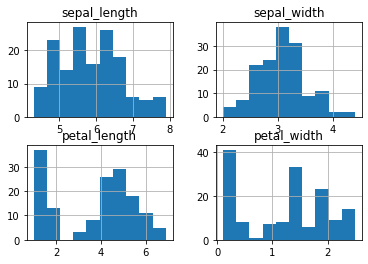

In [11]:
df.hist()
plt.show()

# it looks like sepal length and sepal width has gaussian (noraml) distribution
# we can confirm further by density plots 
# lets see

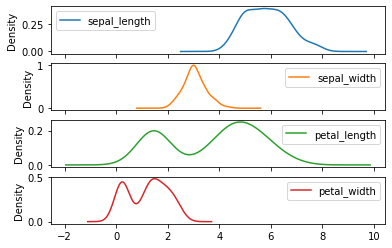

In [13]:
df.plot(kind='density',subplots=True)
plt.show()

# multivariate plots

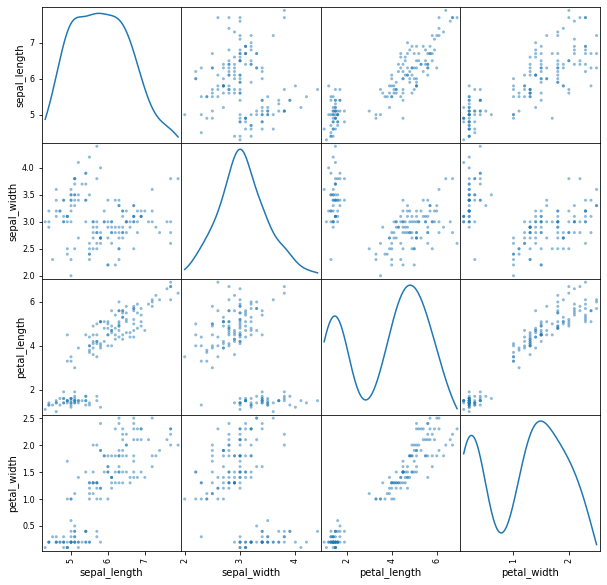

In [17]:
pd.plotting.scatter_matrix(df,diagonal='density',figsize=(10,10))
plt.show()

# diagnol grouping suggests high correlation and predictable relationship

# evalutate some classification alogrithms

# evalutae classification alogrithm

In [20]:
#separate the validation dataset
xtrain,xvalidate,ytrain,yvalidate = ms.train_test_split(x,y,test_size=0.2,random_state=7)

In [22]:
#build models

models = []
models.append(('LogR',LogisticRegression(max_iter=200)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [25]:
results = []
names = []

for name,model in models:
    kfold = ms.KFold(n_splits=10)
    cv_result = ms.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_result.mean(),cv_result.std()))
    
    
#we can see that KNN Logistic Regression, KNN and SVM models perform better

LogR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
DT: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


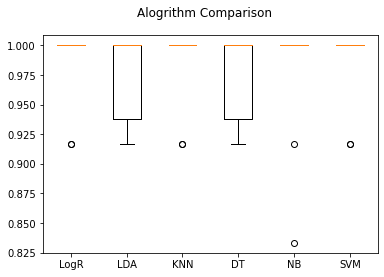

In [38]:
fig = plt.figure()

fig.suptitle('Alogrithm Comparison')

ax = fig.add_subplot(111)

ax.boxplot(results)

ax.set_xticklabels(names)

plt.show()

# make predictions 

In [26]:
LogR = LogisticRegression(max_iter=200)
KNN = KNeighborsClassifier()
SVM = SVC()

In [27]:
LogR.fit(xtrain,ytrain)

LogisticRegression(max_iter=200)

In [28]:
yprediction_log = LogR.predict(xvalidate)

In [29]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [30]:
yprediction_knn = KNN.predict(xvalidate)

In [31]:
SVM.fit(xtrain,ytrain)

SVC()

In [32]:
yprediction_svm = SVM.predict(xvalidate)

# evaluate accuracy

In [34]:
mt.accuracy_score(yvalidate,yprediction_log)

0.8666666666666667

In [35]:
mt.accuracy_score(yvalidate,yprediction_knn)

0.9

In [36]:
mt.accuracy_score(yvalidate,yprediction_svm)

0.8666666666666667

In [39]:
mt.confusion_matrix(yvalidate,yprediction_log)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]], dtype=int64)

In [40]:
mt.confusion_matrix(yvalidate,yprediction_knn)

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]], dtype=int64)

In [41]:
mt.confusion_matrix(yvalidate,yprediction_svm)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]], dtype=int64)

In [42]:
print(mt.classification_report(yvalidate,yprediction_log))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [43]:
print(mt.classification_report(yvalidate,yprediction_knn))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [44]:
print(mt.classification_report(yvalidate,yprediction_svm))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Finalize model

# we can see that the performance of Logistic Regression and SVM is almost same and KNN perform better than these two so final model will be KNN